In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import random

In [ ]:
df = pd.read_csv('/content/Trafic.csv')

In [ ]:
df.head(5)
df = df.sample(frac=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16468 entries, 543 to 15583
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_ip             16468 non-null  object 
 1   dst_ip             16468 non-null  object 
 2   src_port           16468 non-null  int64  
 3   dst_port           16468 non-null  int64  
 4   src_mac            16468 non-null  object 
 5   dst_mac            16468 non-null  object 
 6   protocol           16468 non-null  int64  
 7   timestamp          16468 non-null  object 
 8   flow_duration      16468 non-null  float64
 9   flow_byts_s        16468 non-null  float64
 10  flow_pkts_s        16468 non-null  float64
 11  fwd_pkts_s         16468 non-null  float64
 12  bwd_pkts_s         16468 non-null  float64
 13  tot_fwd_pkts       16468 non-null  int64  
 14  tot_bwd_pkts       16468 non-null  int64  
 15  totlen_fwd_pkts    16468 non-null  int64  
 16  totlen_bwd_pkts    1

In [ ]:
columns=df.columns.to_list

In [ ]:
columns 


<bound method IndexOpsMixin.tolist of Index(['src_ip', 'dst_ip', 'src_port', 'dst_port', 'src_mac', 'dst_mac',
       'protocol', 'timestamp', 'flow_duration', 'flow_byts_s', 'flow_pkts_s',
       'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst

In [ ]:
df['label'].value_counts()

BRUTE      13403
BENING      1772
XSSREFL     1293
Name: label, dtype: int64

In [ ]:
excluded = ['src_ip','dst_ip', 'src_port', 'dst_port', 'src_mac', 'dst_mac','protocol', 'timestamp']
df = df.drop(columns=excluded, errors='ignore')

df.columns

Index(['flow_duration', 'flow_byts_s', 'flow_pkts_s', 'fwd_pkts_s',
       'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts', 'totlen_fwd_pkts',
       'totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min',
       'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max',
       'bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std', 'pkt_len_max',
       'pkt_len_min', 'pkt_len_mean', 'pkt_len_std', 'pkt_len_var',
       'fwd_header_len', 'bwd_header_len', 'fwd_seg_size_min',
       'fwd_act_data_pkts', 'flow_iat_mean', 'flow_iat_max', 'flow_iat_min',
       'flow_iat_std', 'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_min',
       'fwd_iat_mean', 'fwd_iat_std', 'bwd_iat_tot', 'bwd_iat_max',
       'bwd_iat_min', 'bwd_iat_mean', 'bwd_iat_std', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fin_flag_cnt',
       'syn_flag_cnt', 'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt',
       'urg_flag_cnt', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg',
       'init_fwd_win

In [ ]:
benign_total = len(df[df['label'] != "BENING"])
benign_total

14696

In [ ]:
attack_total = len(df[df['label'] == "BENING"])
attack_total

1772

In [ ]:
enlargement = 1.1
benign_included_max = attack_total / 30 * 70
benign_inc_probability = (benign_included_max / benign_total) * enlargement
print(benign_included_max, benign_inc_probability)

4134.666666666667 0.30948103792415177


In [ ]:
import random
indexes = []
benign_included_count = 0
for index, row in df.iterrows():
    if (row['label'] == "BENING"):
        indexes.append(index)
    else:
        # Copying with benign_inc_probability
        if random.random() > benign_inc_probability: continue
        # Have we achieved 70% (5087 records)?
        if benign_included_count > benign_included_max: continue
        benign_included_count += 1
        indexes.append(index)
df = df.loc[indexes]

In [ ]:
df['label'].value_counts()

BRUTE      3768
BENING     1772
XSSREFL     367
Name: label, dtype: int64

In [ ]:
df = df.replace('BENING',0)
df = df.replace('XSSREFL',1)
df = df.replace('BRUTE',1)


In [ ]:
y = df['label'].values
X = df.drop(columns=['label'])
print(X.shape, y.shape)

(5907, 69) (5907,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 1267, 1: 2867}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
decision_tree = decision_tree.fit(X_train, y_train)
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
from sklearn.tree import export_text
r = export_text(decision_tree, feature_names=X_train.columns.to_list())
print(r)

|--- fwd_act_data_pkts <= 1.50
|   |--- flow_duration <= 3935303.50
|   |   |--- fwd_header_len <= 90.00
|   |   |   |--- class: 0
|   |   |--- fwd_header_len >  90.00
|   |   |   |--- class: 1
|   |--- flow_duration >  3935303.50
|   |   |--- class: 0
|--- fwd_act_data_pkts >  1.50
|   |--- class: 0



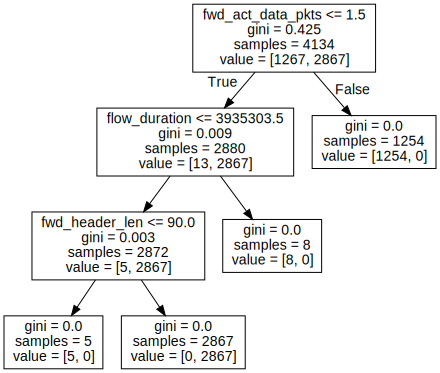

In [ ]:
from graphviz import Source
from sklearn import tree
Source(tree.export_graphviz(decision_tree, out_file=None, feature_names=X.columns))

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 505, 1: 1268}

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 505,    0],
       [   0, 1268]])

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(estimator=decision_tree).fit(X_train, y_train)
sfm.estimator_.feature_importances_

array([0.00904763, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00568041, 0.        , 0.        ,
       0.98527197, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
X_train_new = sfm.transform(X_train)
print("Original num features: {}, selected num features: {}"
      .format(X_train.shape[1], X_train_new.shape[1]))

Original num features: 69, selected num features: 1


In [ ]:
indices = np.argsort(decision_tree.feature_importances_)[::-1]
for idx, i in enumerate(indices[:10]):
    print("{}.\t{} - {}".format(idx, X_train.columns[i], decision_tree.feature_importances_[i]))

0.	fwd_act_data_pkts - 0.9852719679031834
1.	flow_duration - 0.009047625459947176
2.	fwd_header_len - 0.005680406636869472
3.	fwd_iat_max - 0.0
4.	fwd_iat_tot - 0.0
5.	flow_iat_std - 0.0
6.	flow_iat_min - 0.0
7.	flow_iat_max - 0.0
8.	flow_iat_mean - 0.0
9.	fwd_iat_mean - 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=250, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
# Score = mean accuracy on the given test data and labels
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nOut-of-bag Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_))

R^2 Training Score: 1.00 
R^2 Validation Score: 1.00 
Out-of-bag Score: 1.00


In [ ]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
webattack_features = []

for index, i in enumerate(indices[:20]):
    webattack_features.append(features[i])
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#25	0.124	fwd_act_data_pkts
2.	#7	0.118	totlen_fwd_pkts
3.	#22	0.117	fwd_header_len
4.	#20	0.070	pkt_len_std
5.	#5	0.065	tot_fwd_pkts
6.	#12	0.062	fwd_pkt_len_std
7.	#17	0.060	pkt_len_max
8.	#21	0.057	pkt_len_var
9.	#19	0.054	pkt_len_mean
10.	#9	0.052	fwd_pkt_len_max
11.	#11	0.038	fwd_pkt_len_mean
12.	#52	0.030	pkt_size_avg
13.	#0	0.024	flow_duration
14.	#34	0.019	fwd_iat_std
15.	#31	0.017	fwd_iat_max
16.	#27	0.014	flow_iat_max
17.	#29	0.011	flow_iat_std
18.	#26	0.010	flow_iat_mean
19.	#3	0.010	fwd_pkts_s
20.	#30	0.008	fwd_iat_tot


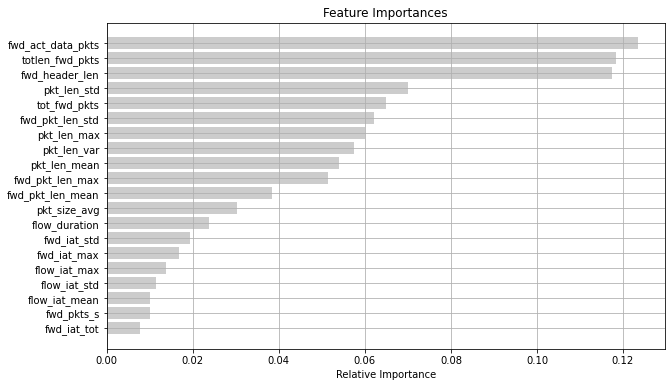

In [ ]:
indices = np.argsort(importances)[-20:]
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#cccccc', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 505,    0],
       [   0, 1268]])

In [ ]:
df['label'].value_counts()

1    4135
0    1772
Name: label, dtype: int64

In [ ]:
max_features = 20
webattack_features = webattack_features[:max_features]
webattack_features

['fwd_act_data_pkts',
 'totlen_fwd_pkts',
 'fwd_header_len',
 'pkt_len_std',
 'tot_fwd_pkts',
 'fwd_pkt_len_std',
 'pkt_len_max',
 'pkt_len_var',
 'pkt_len_mean',
 'fwd_pkt_len_max',
 'fwd_pkt_len_mean',
 'pkt_size_avg',
 'flow_duration',
 'fwd_iat_std',
 'fwd_iat_max',
 'flow_iat_max',
 'flow_iat_std',
 'flow_iat_mean',
 'fwd_pkts_s',
 'fwd_iat_tot']

In [ ]:
to_be_removed = {'flow_iat_std', 'fwd_iat_max', 'fwd_iat_std', 
                 'flow_pkts_s', 'totlen_fwd_pkts', 'fwd_iat_tot', 'fwd_header_len', 'fwd_act_data_pkts' , 'fwd_iat_mean', 'fwd_pkt_len_mean', 'pkt_len_mean', 'pkt_len_var', 'pkt_len_std', 'fwd_pkt_len_mean', 'fwd_pkt_len_max'}
webattack_features = [item for item in webattack_features if item not in to_be_removed]
webattack_features = webattack_features[:10]
webattack_features.append('label')
webattack_features

['tot_fwd_pkts',
 'fwd_pkt_len_std',
 'pkt_len_max',
 'pkt_size_avg',
 'flow_duration',
 'flow_iat_max',
 'flow_iat_mean',
 'fwd_pkts_s',
 'label']

In [ ]:
df[webattack_features].to_csv('Traffci2.csv')